In [1]:
import os
import sys
import fitsio
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import matplotlib as mpl

from   astropy.table import Table

In [2]:
cwd = os.getcwd()
code_root = '/'.join(x for x in cwd.split('/')[:-2])

sys.path.append(code_root)
sys.path.append(os.environ['HOME'])

print(cwd)
print(code_root)

/cosma/home/durham/dc-wils7/DESI/docs/nb
/cosma/home/durham/dc-wils7/DESI


In [3]:
import pubplot

from   cosmo         import cosmo, fsky
from   cartesian     import rotate
from   findfile      import findfile
# from   poisson     import fillfactor_expectation, fillfactor_poisson

In [4]:
survey  = 'gama'
field   = 'G12'
dryrun  = False
realz   = 0
version = 'GAMA4'

In [5]:
nbar   = 2.
radius = 8.

In [6]:
fpath = findfile(ftype='randoms', field=field, dryrun=dryrun, survey=survey, version=version)
rand  = Table.read(fpath)
rand.meta

OrderedDict([('ZMIN', 0.039),
             ('ZMAX', 0.263),
             ('DZ', 0.0001),
             ('NRAND', 1265954),
             ('FIELD', 'G12'),
             ('AREA', 60.0),
             ('VOL', 2531908.950723488),
             ('RAND_DENS', 0.4999998122516435),
             ('VOL8', 2144.660584850632),
             ('OVERSAMPLE', 1),
             ('SEED', 364),
             ('PREFIX', 'randoms'),
             ('REALZ', 0),
             ('FPATH',
              '/cosma5/data/durham/dc-wils7/GAMA4/randoms/randoms_G12_0.fits'),
             ('NRAND8', 1072.329889768816),
             ('NRAND8_PERR', 32.74644850619401),
             ('EXTNAME', 'RANDOMS')])

In [7]:
bound = Table.read(fpath, 'BOUNDARY')
bound

<Table length=540000>
     BOUND_RA            BOUND_DEC                Z                  V          BOUNDID FIELD  ...     CARTESIAN_Y           CARTESIAN_Z        ROTCARTESIAN_X      ROTCARTESIAN_Y      ROTCARTESIAN_Z   
     float64              float64              float64            float64        int64  bytes3 ...       float64               float64             float64             float64             float64       
------------------ --------------------- ------------------- ------------------ ------- ------ ... -------------------- --------------------- ------------------ ------------------- --------------------
             186.0   -0.5993622151357236 0.05520029111434571 25450.277925589246       0    G12 ...  -17.115255970830113   -1.7128976098097186 162.84953021753805  17.115255970830134 -0.29179651419001584
             186.0 -0.028078089756552682 0.02507335637062634 1252.5211727124665       1    G12 ...   -7.819985898051385 -0.036662017857306106  74.39968278570491   7.819985898051394    0.612612781457468
             174.0    1.7601640018222424  0.1141365459616218 226979.42024797926       2    G12 ...    34.96143648508756    10.278313460512154 332.53348874114016  -34.96143648508752     13.1806806343405
             174.0      0.31087012077912  0.0678823320259114 48076.744366326275       3    G12 ...   20.995977137633794    1.0898384770690364 199.74626166846852  -20.99597713763377    2.833039193637972
             186.0    1.6954966166290735  0.1808272869698552  869688.0663966932       4    G12 ...   -54.63277733078178    15.471050472065842  519.6413537554804   54.63277733078184    20.00648097752842
             174.0    0.9719885776508628  0.1639061989577662  654285.7316197306       5    G12 ...    49.71109234158724     8.068613906797232  472.8810296822977  -49.71109234158718   12.195691373385184
             174.0    0.7307081189790998  0.0685141390459894 49449.325588255306       6    G12 ...     21.1873463047443     2.585156540030515 201.55389939469168 -21.187346304744274    4.344189211347789
             174.0   -1.0917565750730562 0.24496919965777397 2076816.2689225085       7    G12 ...     73.0214823312565   -13.312874228623086  694.8427170914478  -73.02148233125641    -7.24958063395462
             186.0   -1.5835953732819252 0.12995062167357416 332377.76614305045       8    G12 ...   -39.68095847575734   -10.494935824197782  377.6163097291358   39.68095847575739   -7.199927843772027
             174.0   -2.8839431549239434 0.16511581239791553  668399.9323559429       9    G12 ...    50.00909703469813    -24.10157897041801  475.9969813112581  -50.00909703469807   -19.94853399493533
             186.0   -1.3938154868387427 0.15936204846720517  602971.9863125351      10    G12 ...   -48.37135402005392   -11.259575407822487 460.30342450562733   48.37135402005398   -7.242997024984015
               ...                   ...                 ...                ...     ...    ... ...                  ...                   ...                ...                 ...                  ...
185.38932654807275    -1.838098201091123               0.263 2540133.4605142004  539988    G12 ...    -70.1421371674023    -23.96640132805356  743.6854350130894   70.14213716740238   -17.47726946065596
    180.3299369993   -0.2682474249713884                0.02                0.0  539989    G12 ... -0.34396202996091385   -0.2796537311802158 59.730826250531294  0.3439620299609212  0.24159864377830093
178.50645007166747   -2.0548228313647927                0.02                0.0  539990    G12 ...    1.555886280920968   -2.1417458024809806  59.69003367009062 -1.5558862809209606  -1.6209203244389823
176.29349214991277   -2.4155490616562405               0.263 2540133.4605142004  539991    G12 ...   48.259688110405776    -31.49167907346713  745.2113305130374  -48.25968811040568  -24.989517468207737
176.07975644173825    0.5754841720463562                0.02                0.0  539992    G12 ...   4.0835594066153655    0.599946776474932

In [8]:
fpath = findfile(ftype='randoms_n8', field=field, dryrun=dryrun, survey=survey, version=version)
rand  = Table.read(fpath)
rand.meta

OrderedDict([('ZMIN', 0.039),
             ('ZMAX', 0.263),
             ('DZ', 0.0001),
             ('NRAND', 1265954),
             ('FIELD', 'G12'),
             ('AREA', 60.0),
             ('VOL', 2531908.950723488),
             ('RAND_DENS', 0.4999998122516435),
             ('VOL8', 2144.660584850632),
             ('OVERSAMPLE', 1),
             ('SEED', 364),
             ('PREFIX', 'randoms'),
             ('REALZ', 0),
             ('FPATH',
              '/cosma5/data/durham/dc-wils7/GAMA4/randoms/randoms_G12_0.fits'),
             ('NRAND8', 1072.329889768816),
             ('NRAND8_PERR', 32.74644850619401),
             ('EXTNAME', 'RANDOMS'),
             ('RSPHERE', 8.0),
             ('IMMUTABLE', 'FALSE')])

In [9]:
fpath = findfile(ftype='randoms_bd', field=field, dryrun=dryrun, survey=survey, version=version)
rand  = Table.read(fpath)
rand.meta

OrderedDict([('ZMIN', 0.039),
             ('ZMAX', 0.263),
             ('DZ', 0.0001),
             ('NRAND', 1265954),
             ('FIELD', 'G12'),
             ('AREA', 60.0),
             ('VOL', 2531908.950723488),
             ('RAND_DENS', 0.4999998122516435),
             ('VOL8', 2144.660584850632),
             ('OVERSAMPLE', 1),
             ('SEED', 364),
             ('PREFIX', 'randoms'),
             ('REALZ', 0),
             ('FPATH',
              '/cosma5/data/durham/dc-wils7/GAMA4/randoms/randoms_G12_0.fits'),
             ('NRAND8', 1072.329889768816),
             ('NRAND8_PERR', 32.74644850619401),
             ('EXTNAME', 'RANDOMS'),
             ('RSPHERE', 8.0),
             ('IMMUTABLE', 'FALSE')])

In [10]:
rand

<Table length=1265954>
    RANDOM_RA           RANDOM_DEC               Z                  V           RANDID FIELD  GAMA_FIELD ... IN_D8LUMFN RAND_N8     FILLFACTOR         BOUND_DIST     BOUNDID FILLFACTOR_POISSON
     float64             float64              float64            float64        int64  bytes3   bytes3   ...   int64     int32       float64            float64        int64       float64      
------------------ -------------------- ------------------- ------------------ ------- ------ ---------- ... ---------- ------- ------------------ ------------------ ------- ------------------
177.72809320816467  -2.0702691893740615 0.17751396119884158  825706.2276518778  402945    G12        G12 ...          0    8635                1.0  8.345444630532715  432841 1.0065695118541713
185.54664637327164  0.25695371228937774 0.22243354892541328 1578636.6929936863  277832    G12        G12 ...          0    7848 0.9148300554755687  5.050230073656169  538012 0.9148300554755687
176.45117350162005   0.6212761539245919 0.18363377874851908  910555.8371590216  366284    G12        G12 ...          0    8717                1.0 12.775713491312136  390511    1.0161281337386
177.90684687764795  -1.7315944613831566  0.2070583468405367  1286029.848851052  387061    G12        G12 ...          0    8594                1.0 13.187751171631119  450843 1.0017902009119568
177.28088511570968  -2.7060099832935727  0.1509916295398498  516655.2201594547  331357    G12        G12 ...          0    6068 0.7073380194477257 2.2668126510513917  379719 0.7073380194477257
175.75760294502552   1.9226485835692364    0.25543330686274 2339908.9859921024  321068    G12        G12 ...          0    5170 0.6026594529572745 1.2403336628985395  502068 0.6026594529572745
 175.5280043525956    1.889628567217554  0.2227479384839168 1585018.4626383276  939365    G12        G12 ...          0    5306 0.6185127770582782 1.4109026219476302  376496 0.6185127770582782
185.29516679335447 -0.28156420098474266 0.22311279706373863 1592444.9211959012  391442    G12        G12 ...          0    8543 0.9958452043740805  7.878819542840583  375556 0.9958452043740805
 175.5994395205367   -2.835367677834231 0.12580758913173934 303539.14248430094  820857    G12        G12 ...          0    5017 0.5848244633436454   1.14282440728986  420017 0.5848244633436454
177.71388327602105  -1.5768327114930043 0.21810420824260576 1492399.1999856418  998810    G12        G12 ...          0    8597                1.0  15.55945327328486  417805 1.0021399065906555
  175.431021193899  -0.8339807200936341 0.19232054269926727 1040239.2292383082  987868    G12        G12 ...          0    8510                1.0 13.856548610753318  486540 0.9919984419083958
               ...                  ...                 ...                ...     ...    ...        ... ...        ...     ...                ...                ...     ...                ...
184.41509712983395    1.737753746636142  0.2587479413231683 2426911.2628375283  133580    G12        G12 ...          0    6724 0.7838069945231555 3.3946588301834475  453956 0.7838069945231555
 182.2747333250698 -0.07361470783549605  0.2086733837773579 1314996.7947965364 1051962    G12        G12 ...          0    8632                1.0 21.712526133669382  397476 1.0062198061754726
 182.2206817967386   0.9395135822456225 0.16011312181304607  612567.0578504868 1251242    G12        G12 ...          0    8556                1.0  8.609393377024215  441313 0.9973605956484412
180.69625179933178   1.5072056556986615 0.15834482302365324   593149.564352388  259935    G12        G12 ...          0    7188 0.8378948061618742 3.9593935942047107  449696 0.8378948061618742
182.99961706838454   1.0666554528788779 0.17732657003259092  823191.3824446601  177383    G12        G12 ...          0    8518                1.0  8.393082964051972  432288 0.9929309903849254
180.63233426772734  -0.3136302940986483 0.17272370498951833  762947.2019990672  610439    G12        G12 ...         

In [11]:
fpath = findfile(ftype='randoms_bd_ddp_n8', field=field, dryrun=dryrun, survey=survey, version=version)

rand  = Table.read(fpath)
rand.meta

OrderedDict([('ZMIN', 0.039),
             ('ZMAX', 0.263),
             ('DZ', 0.0001),
             ('NRAND', 1265954),
             ('FIELD', 'G12'),
             ('AREA', 60.0),
             ('VOL', 2531908.950723488),
             ('RAND_DENS', 0.4999998122516435),
             ('VOL8', 2144.660584850632),
             ('OVERSAMPLE', 1),
             ('SEED', 364),
             ('PREFIX', 'randoms'),
             ('REALZ', 0),
             ('FPATH',
              '/cosma5/data/durham/dc-wils7/GAMA4/randoms/randoms_G12_0.fits'),
             ('NRAND8', 1072.329889768816),
             ('NRAND8_PERR', 32.74644850619401),
             ('EXTNAME', 'RANDOMS'),
             ('RSPHERE', 8.0),
             ('IMMUTABLE', 'FALSE'),
             ('GOLD_NGAL', 115912),
             ('RLIM', 19.8),
             ('RMAX', 12.0),
             ('MAX_SEP', 70.0),
             ('THETA_DEF', 'Z_THETA_QCOLOR'),
             ('DDP1_ZMIN', 0.02012999914586544),
             ('DDP1_ZMAX', 0.2629899978637

Text(0, 0.5, 'DEC [deg.]')

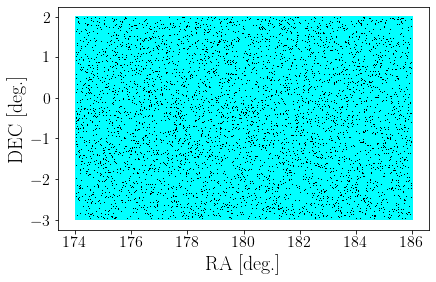

In [12]:
pl.plot(rand['RANDOM_RA'], rand['RANDOM_DEC'], marker=',', lw=0.0, c='k')
pl.plot(bound['BOUND_RA'], bound['BOUND_DEC'], marker=',', lw=0.0, c='cyan')
pl.xlabel('RA [deg.]')
pl.ylabel('DEC [deg.]')

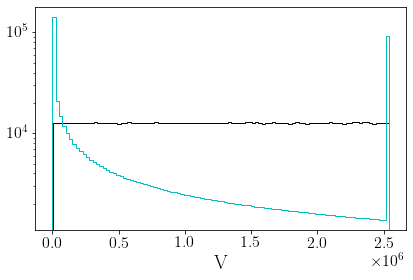

In [13]:
_ = pl.hist(rand['V'], bins=100, histtype='step', color='k')
_ = pl.hist(bound['V'], bins=100, histtype='step', color='c')

pl.xlabel('V')
pl.yscale('log')

(0.0, 0.6)

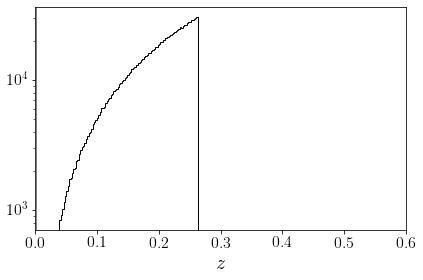

In [14]:
_ = pl.hist(rand['Z'], bins=100, histtype='step', color='k')

pl.axvline(300. / 2.9979e5, lw=0.5, c='k')

pl.yscale('log')
pl.xlabel('$z$')

pl.xlim(0.0, 0.6)

In [15]:
pos       = np.c_[rand['ROTCARTESIAN_X'], rand['ROTCARTESIAN_Y'], rand['ROTCARTESIAN_Z']]
pos_bound = np.c_[bound['ROTCARTESIAN_X'], bound['ROTCARTESIAN_Y'], bound['ROTCARTESIAN_Z']]

Text(0, 0.5, '$y$')

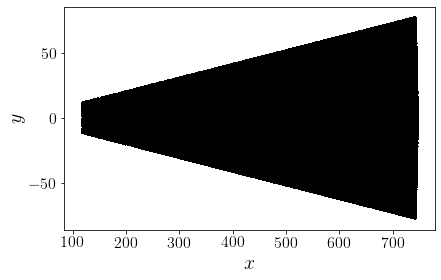

In [16]:
pl.plot(pos[::1,0], pos[::1,1], marker=',', lw=0.0, c='k')

pl.xlabel('$x$')
pl.ylabel('$y$')

Text(0, 0.5, '$y$')

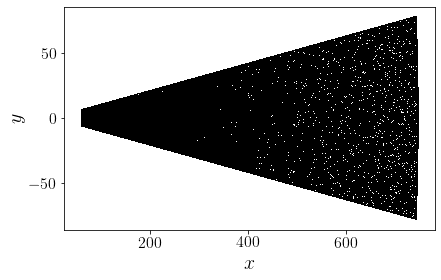

In [17]:
pl.plot(pos_bound[:,0], pos_bound[:,1], marker=',', lw=0.0, c='k')
pl.xlabel('$x$')
pl.ylabel('$y$')

(0.0, 1000.0)

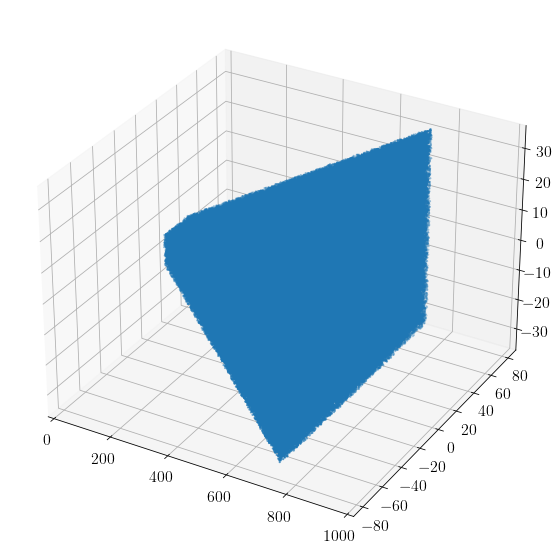

In [18]:
fig = plt.figure(figsize=(10,10))
ax  = fig.add_subplot(projection='3d')

ax.scatter(pos[::1, 0],\
           pos[::1, 1],\
           pos[::1, 2],\
           marker='.',\
           lw=0.0)

ax.set_xlim(0.0, 1000.)

(0.0, 1000.0)

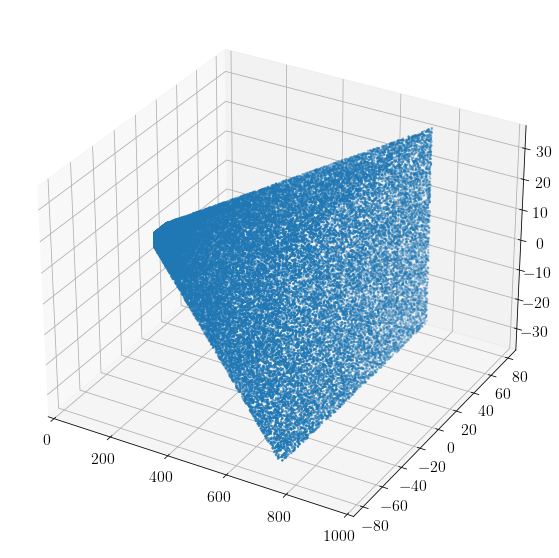

In [19]:
fig = plt.figure(figsize=(10,10))
ax  = fig.add_subplot(projection='3d')

ax.scatter(pos_bound[:,0][::10],\
           pos_bound[:,1][::10],\
           pos_bound[:,2][::10],\
           marker='.',\
           lw=0.0)

ax.set_xlim(0.0, 1000.)

In [20]:
np.mean(rand['V'] < np.percentile(rand['V'], 1.))

0.01000036336233386

In [21]:
rand['RAND_N8'].data.min(), rand['RAND_N8'].data.max()

(1384, 8935)

(50.0, 9500.0)

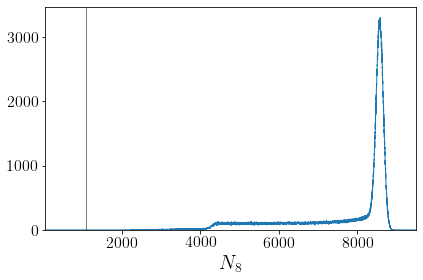

In [22]:
_ = pl.hist(rand['RAND_N8'], bins=np.arange(0, 9500, 1), histtype='step')

pl.axvline(rand.meta['NRAND8'], c='k', lw=0.5)

pl.xlabel(r'$N_8$')
pl.xlim(50., 9500.)

In [23]:
# 100. * np.sqrt(rand.meta['NRAND8']) / rand.meta['NRAND8']

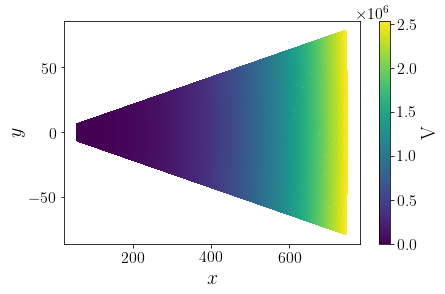

In [24]:
# isin = rand['IS_BOUNDARY'].astype(bool)

pl.scatter(pos_bound[:,0], pos_bound[:,1], lw=0.0, c=bound['V'], s=2)
pl.xlabel('$x$')
pl.ylabel('$y$')
pl.colorbar(label='V')

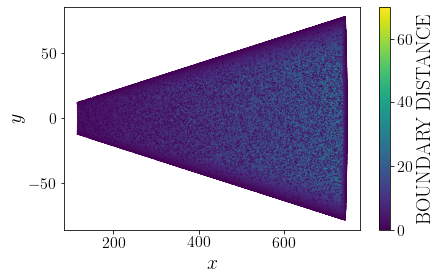

In [25]:
pl.scatter(pos[:,0], pos[:,1], lw=0.0, c=rand['BOUND_DIST'], s=2, vmin=0., vmax=70.)
pl.xlabel('$x$')
pl.ylabel('$y$')
pl.colorbar(label='BOUNDARY DISTANCE')

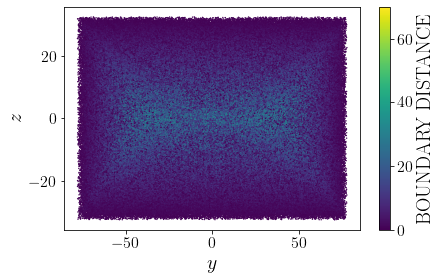

In [26]:
pl.scatter(pos[:,1], pos[:,2], lw=0.0, c=rand['BOUND_DIST'], s=2, vmin=0., vmax=70.)
pl.xlabel('$y$')
pl.ylabel('$z$')
pl.colorbar(label='BOUNDARY DISTANCE')

In [27]:
# pl.scatter(pos_bound[:,0], pos_bound[:,1], lw=0.0, c=bound['RAND_N8'], vmin=0, vmax=1500, s=2)
# pl.xlabel('$x$')
# pl.ylabel('$y$')
# pl.colorbar(label=r'$N_8$')

(0.2, 1.1)

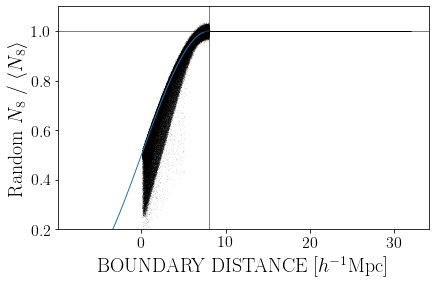

In [28]:
def theory_ff(bound_dist, radius):
    d = bound_dist
    r = radius
    sphere_cap_vol = 1. - (3. * 8. - d) * d**2 / 4. / 8**3. # [V sphere]
    
    return sphere_cap_vol

d = np.arange(0., 16., 0.1)
r = np.ones_like(d) * 8 # Mpc/h

sphere_cap_vol = 1. - (3. * 8. - d) * d**2 / 4. / 8**3. # [V sphere]

#isin = ~rand['IS_BOUNDARY'].astype(bool)

pl.scatter(rand['BOUND_DIST'], rand['FILLFACTOR'], marker='.', lw=0.0, s=2, alpha=0.1, c='k')

# pl.plot(8. - d, sphere_cap_vol)
pl.plot(8. - d, theory_ff(d, 8), lw=1.)

pl.xlabel('BOUNDARY DISTANCE [$h^{-1}$Mpc]')
pl.ylabel(r'Random $N_8 \ / \ \langle N_8 \rangle$')

pl.axhline(1.00, c='k', lw=0.5)
pl.axvline(8.00, c='k', lw=0.5)

pl.ylim(0.2, 1.1)

Text(0.5, 0, 'BOUND_DIST [$h^{-1}$Mpc]')

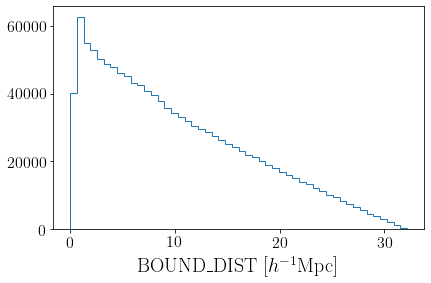

In [29]:
_ = pl.hist(rand['BOUND_DIST'], bins=50, histtype='step')
pl.xlabel('BOUND_DIST [$h^{-1}$Mpc]')

In [30]:
fpath = findfile(ftype='ddp_n8', dryrun=dryrun, survey=survey, version=version)
gold  = Table.read(fpath)
gold.meta

OrderedDict([('AREA', 180.0),
             ('GOLD_NGAL', 113687),
             ('IMMUTABLE', 'False'),
             ('RLIM', 19.8),
             ('RMAX', 12.0),
             ('MAX_SEP', 70.0),
             ('THETA_DEF', 'Z_THETA_QCOLOR'),
             ('DDP1_ZMIN', 0.0390699990093708),
             ('DDP1_ZMAX', 0.2629899978637695),
             ('DDP1_VZ', 7594754.153764196),
             ('DDP1ZLIMS_NGAL', 113687),
             ('DDP1_NGAL', 45293),
             ('DDP1_DENS', 0.005963721679858641),
             ('DDP2_ZMIN', 0.03914999961853027),
             ('DDP2_ZMAX', 0.1937000006437302),
             ('DDP2_VZ', 3156659.558717707),
             ('DDP2ZLIMS_NGAL', 73942),
             ('DDP2_NGAL', 33396),
             ('DDP2_DENS', 0.01057953807776663),
             ('DDP3_ZMIN', 0.03903000056743622),
             ('DDP3_ZMAX', 0.1015800014138222),
             ('DDP3_VZ', 457819.2340050841),
             ('DDP3ZLIMS_NGAL', 18121),
             ('DDP3_NGAL', 8842),
            

In [31]:
fpath = findfile(ftype='randoms_bd_ddp_n8', field=field, dryrun=dryrun, survey=survey, version=version, prefix='randoms_ddp1')

rand  = Table.read(fpath)
rand.meta

OrderedDict([('ZMIN', 0.02012999914586544),
             ('ZMAX', 0.2629899978637695),
             ('DZ', 0.0001),
             ('NRAND', 1269917),
             ('FIELD', 'G12'),
             ('AREA', 60.0),
             ('VOL', 2539834.822721605),
             ('RAND_DENS', 0.4999998380363956),
             ('VOL8', 2144.660584850632),
             ('OVERSAMPLE', 1),
             ('SEED', 364),
             ('PREFIX', 'randoms_ddp1'),
             ('REALZ', 0),
             ('FPATH',
              '/cosma5/data/durham/dc-wils7/GAMA4/randoms/randoms_ddp1_G12_0.fits'),
             ('NRAND8', 1072.329945068358),
             ('NRAND8_PERR', 32.74644935055338),
             ('EXTNAME', 'RANDOMS'),
             ('RSPHERE', 8.0),
             ('IMMUTABLE', 'FALSE'),
             ('GOLD_NGAL', 115912),
             ('RLIM', 19.8),
             ('RMAX', 12.0),
             ('MAX_SEP', 70.0),
             ('THETA_DEF', 'Z_THETA_QCOLOR'),
             ('DDP1_ZMIN', 0.02012999914586544),
     

In [32]:
pos       = np.c_[rand['ROTCARTESIAN_X'], rand['ROTCARTESIAN_Y'], rand['ROTCARTESIAN_Z']]
pos

array([[587.2989842 , -49.78213602,   7.80104111],
       [565.38066795, -45.2147294 ,  10.34680709],
       [284.00603423,  -5.96525745,   2.64443728],
       ...,
       [416.23529468,  24.72607625,   5.10028483],
       [570.87630076,  27.35999389,  23.30822476],
       [730.54532457,  50.23449599,  -9.92803413]])

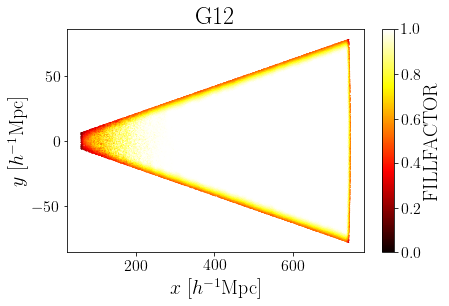

In [33]:
fills     = rand['FILLFACTOR'].data
pos_slice = pos

fills     = fills[np.abs(pos_slice[:,2]) < 5.]
pos_slice = pos_slice[np.abs(pos_slice[:,2]) < 5.]
    
plt.scatter(pos_slice[:,0],\
            pos_slice[:,1],\
            c=fills,\
            marker='.',\
            lw=0.0,\
            s=4,\
            vmin=0.,\
            vmax=1.,\
            cmap='hot')

pl.xlabel('$x$ [$h^{-1}$Mpc]')
pl.ylabel('$y$ [$h^{-1}$Mpc]')

pl.colorbar(label='FILLFACTOR')
    
plt.title('{}'.format(field))
plt.show()

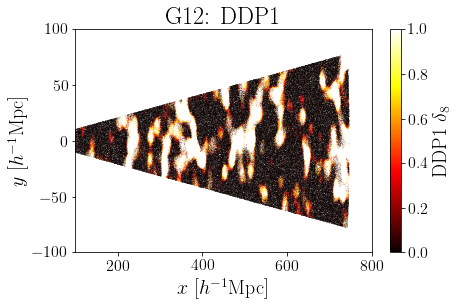

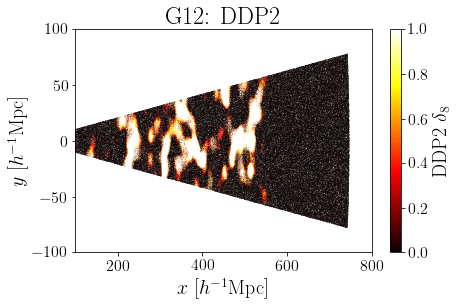

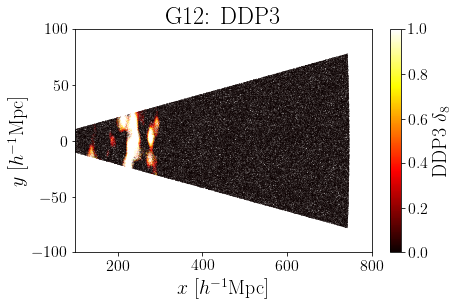

In [34]:
for idx in np.arange(1, 4, 1):
    fills     = rand['DDP{}_DELTA8'.format(idx)].data
    pos_slice = pos

    fills     = fills[np.abs(pos_slice[:,2]) < 5.]
    pos_slice = pos_slice[np.abs(pos_slice[:,2]) < 5.]
    
    plt.scatter(pos_slice[:,0],\
                pos_slice[:,1],\
                c=fills,\
                marker='.',\
                lw=0.0,\
                s=1,\
                vmin=0.,\
                vmax=1.,\
                cmap='hot')
    
    pl.xlabel('$x$ [$h^{-1}$Mpc]')
    pl.ylabel('$y$ [$h^{-1}$Mpc]')

    pl.xlim(100.,  800.)
    pl.ylim(-100., 100.)
    
    pl.colorbar(label='DDP{}  $\delta_8$'.format(idx))
    
    plt.title('{}:  DDP{}'.format(field, idx))
    plt.show()

In [35]:
cmap     = plt.cm.tab20c

cmaplist = [cmap(i) for i in range(cmap.N)]

cmap     = mpl.colors.LinearSegmentedColormap.from_list('Custom cmap', cmaplist, cmap.N)

bounds   = np.linspace(0, 9, 10)
norm     = mpl.colors.BoundaryNorm(bounds, cmap.N)

-29.02883826413795 29.010741776236017


Text(0.5, 1.0, 'G12:  DDP1')

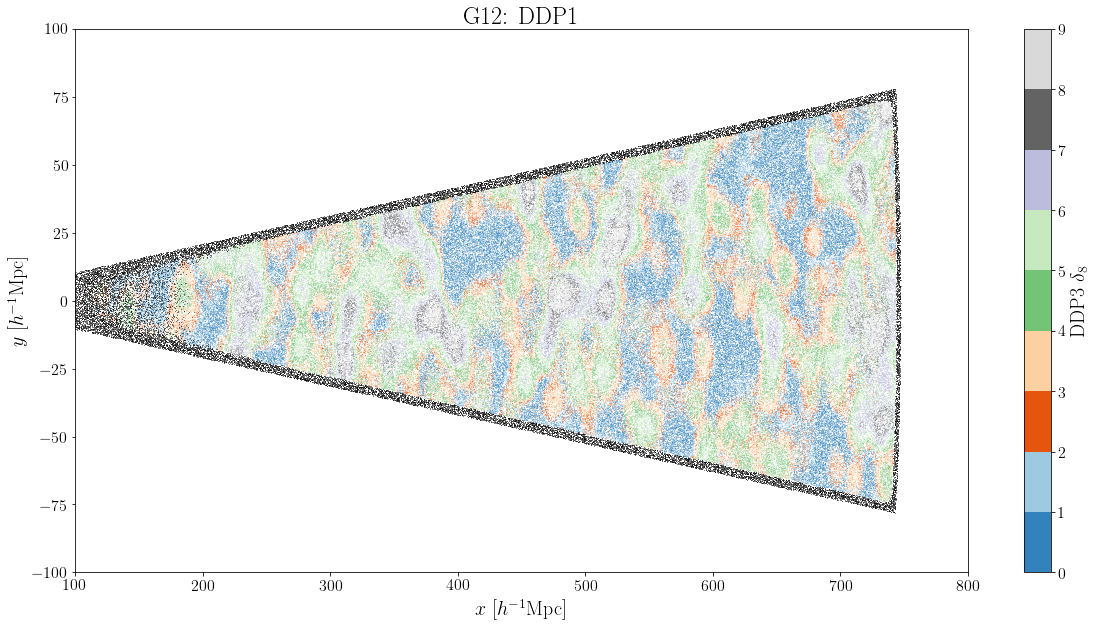

In [36]:
slice_limit = 5.

fig, ax   = plt.subplots(1,1,figsize=(20,10))

isin      = rand['FILLFACTOR'].data > 0.8

fills     = rand['DDP1_DELTA8_TIER'].data[isin]
pos_slice = pos[isin]

lims      = np.sort(pos_slice[:,2])

print(lims[0], lims[-1])

fills     = fills[np.abs(pos_slice[:,2]) < slice_limit]
pos_slice = pos_slice[np.abs(pos_slice[:,2]) < slice_limit]
    
mm = ax.scatter(pos_slice[:,0],\
           pos_slice[:,1],\
           c=fills,\
           marker='.',\
           lw=0.0,\
           s=2,\
           cmap=cmap,\
           norm=norm)

isin      = rand['FILLFACTOR'].data < 0.8
pos_slice = pos[isin]

ax.scatter(pos_slice[:,0][np.abs(pos_slice[:,2]) < slice_limit],\
           pos_slice[:,1][np.abs(pos_slice[:,2]) < slice_limit],\
           c='k',\
           marker='.',\
           lw=0.0,\
           s=2,\
           alpha=0.75)

ax.set_xlabel('$x$ [$h^{-1}$Mpc]')
ax.set_ylabel('$y$ [$h^{-1}$Mpc]')

ax.set_xlim(100.,  800.)
ax.set_ylim(-100., 100.)
    
fig.colorbar(label='DDP{}  $\delta_8$'.format(idx), ax=ax, mappable=mm)
    
ax.set_title('{}:  DDP1'.format(field))

-32.57452706888504 32.59607985262838


Text(0.5, 1.0, 'G12:  DDP1')

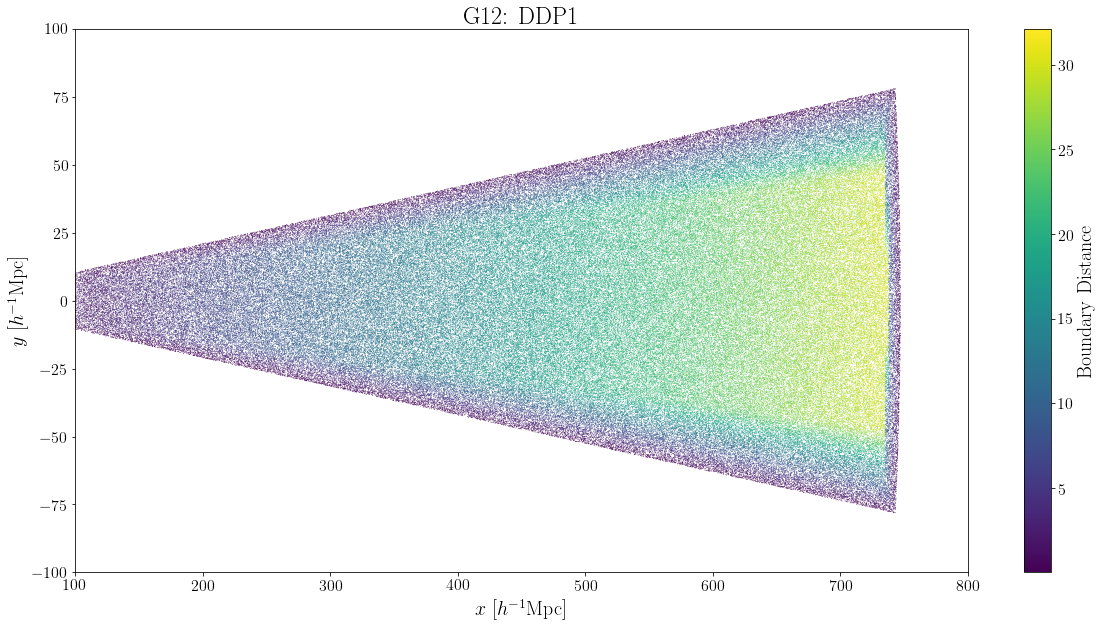

In [37]:
fig, ax   = plt.subplots(1,1,figsize=(20,10))

isin      = rand['FILLFACTOR'].data > 0.0

fills     = rand['BOUND_DIST'].data[isin]
pos_slice = pos[isin]

lims      = np.sort(pos_slice[:,2])

print(lims[0], lims[-1])

fills     = fills[np.abs(pos_slice[:,2]) < 5.]
pos_slice = pos_slice[np.abs(pos_slice[:,2]) < 5.]
    
mm = ax.scatter(pos_slice[:,0],\
           pos_slice[:,1],\
           c=fills,\
           marker='.',\
           lw=0.0,\
           s=2)

ax.set_xlabel('$x$ [$h^{-1}$Mpc]')
ax.set_ylabel('$y$ [$h^{-1}$Mpc]')

ax.set_xlim(100.,  800.)
ax.set_ylim(-100., 100.)
    
fig.colorbar(label='Boundary Distance'.format(idx), ax=ax, mappable=mm)
    
ax.set_title('{}:  DDP1'.format(field))

-32.57452706888504 32.59607985262838


Text(0.5, 1.0, 'G12:  DDP1')

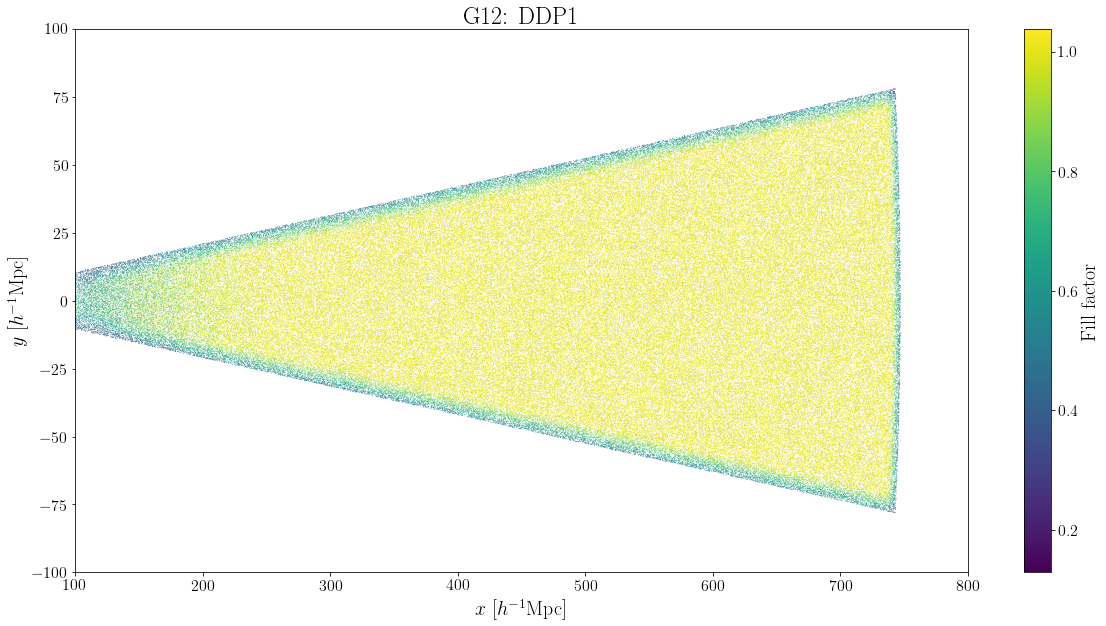

In [38]:
fig, ax   = plt.subplots(1,1,figsize=(20,10))

isin      = rand['FILLFACTOR'].data > 0.0

fills     = rand['FILLFACTOR'].data[isin]
pos_slice = pos[isin]

lims      = np.sort(pos_slice[:,2])

print(lims[0], lims[-1])

fills     = fills[np.abs(pos_slice[:,2]) < 5.]
pos_slice = pos_slice[np.abs(pos_slice[:,2]) < 5.]
    
mm = ax.scatter(pos_slice[:,0],\
           pos_slice[:,1],\
           c=fills,\
           marker='.',\
           lw=0.0,\
           s=2)

ax.set_xlabel('$x$ [$h^{-1}$Mpc]')
ax.set_ylabel('$y$ [$h^{-1}$Mpc]')

ax.set_xlim(100.,  800.)
ax.set_ylim(-100., 100.)
    
fig.colorbar(label='Fill factor'.format(idx), ax=ax, mappable=mm)
    
ax.set_title('{}:  DDP1'.format(field))

Text(0, 0.5, 'DDP1 $\\delta_8$')

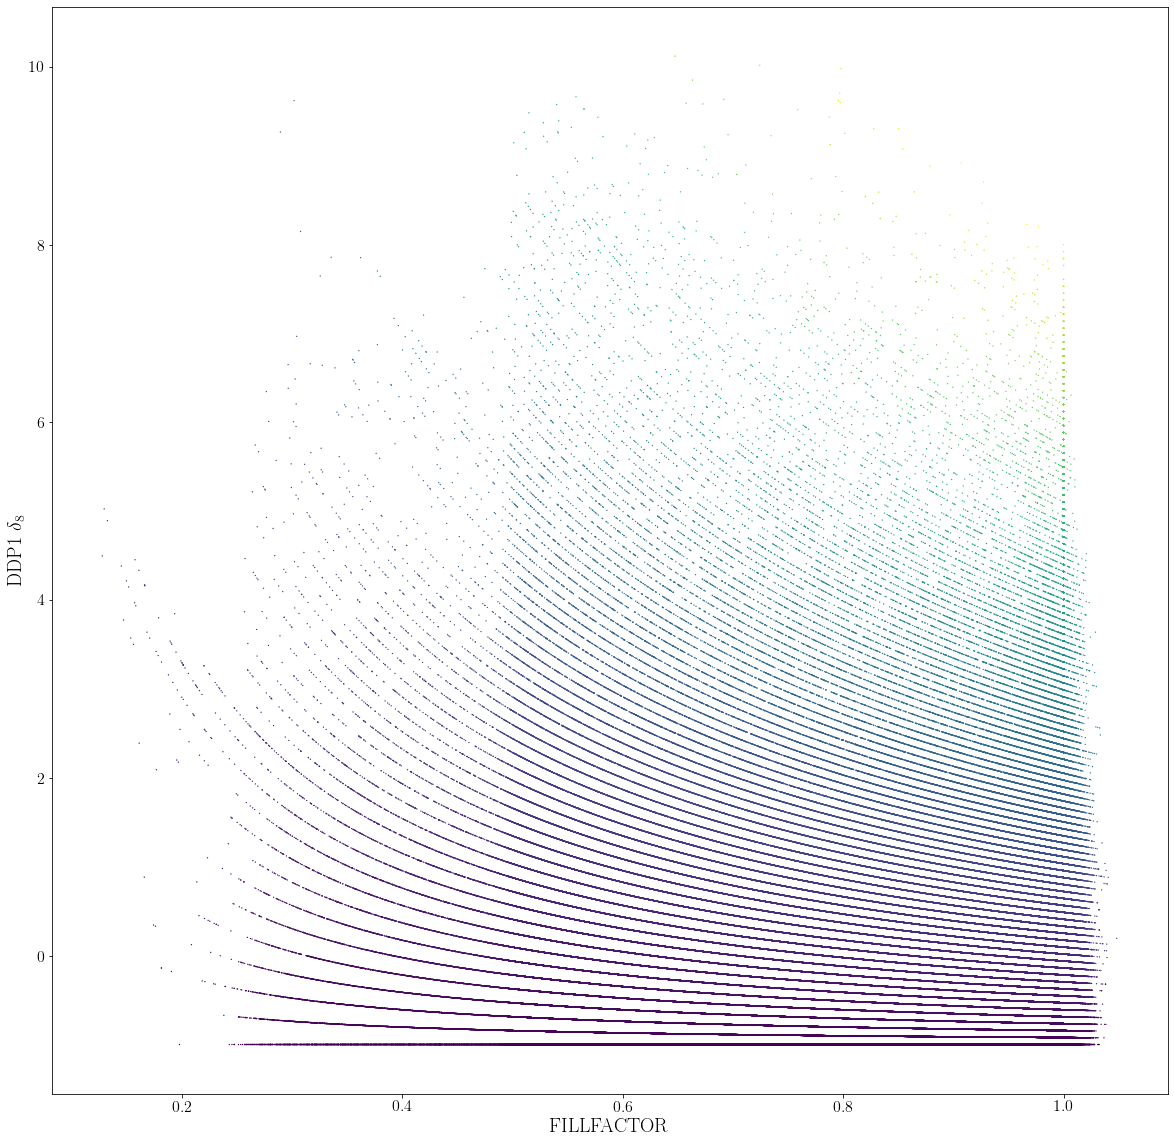

In [39]:
fig, ax = plt.subplots(1,1,figsize=(20,20))

ax.scatter(rand['FILLFACTOR'], rand['DDP1_DELTA8'], marker='.', lw=0.0, c=rand['DDP1_N8'], s=7)

ax.set_xlabel('FILLFACTOR')
ax.set_ylabel('DDP1 $\delta_8$')

Text(0, 0.5, 'DDP2 $\\delta_8$')

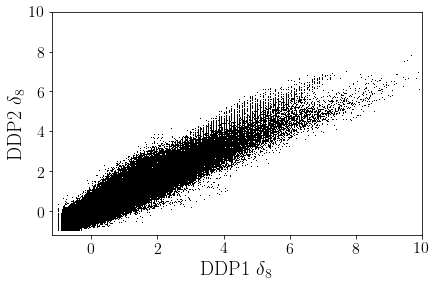

In [40]:
# Larger minimum redshift & Smaller maximum redshift. 
isin = (rand['Z'] > gold.meta['DDP1_ZMIN']) & (rand['Z'] < gold.meta['DDP2_ZMAX'])

pl.plot(rand['DDP1_DELTA8'][isin], rand['DDP2_DELTA8'][isin], marker=',', lw=0.0, c='k')

pl.xlim(-1.2, 10.)
pl.ylim(-1.2, 10.)

pl.xlabel('DDP1 $\delta_8$')
pl.ylabel('DDP2 $\delta_8$')

In [41]:
rand_ddp1fill = np.clip(np.sort(rand[rand['IN_DDP1']]['FILLFACTOR'].data)[::-1], 0, 1) 
rand_ddp2fill = np.clip(np.sort(rand[rand['IN_DDP2']]['FILLFACTOR'].data)[::-1], 0, 1)
rand_ddp3fill = np.clip(np.sort(rand[rand['IN_DDP3']]['FILLFACTOR'].data)[::-1], 0, 1)

KeyError: 'IN_DDP1'

In [ ]:
plt.plot(rand_ddp1fill, np.cumsum(rand_ddp1fill) / len(rand_ddp1fill), lw=1, color='blue',  label=r'${:.3f} \leq z \leq {:.3f}$'.format(rand.meta['DDP1_ZMIN'], rand.meta['DDP1_ZMAX']))
plt.plot(rand_ddp2fill, np.cumsum(rand_ddp2fill) / len(rand_ddp2fill), lw=1, color='green', label=r'${:.3f} \leq z \leq {:.3f}$'.format(rand.meta['DDP2_ZMIN'], rand.meta['DDP2_ZMAX']))
plt.plot(rand_ddp3fill, np.cumsum(rand_ddp3fill) / len(rand_ddp3fill), lw=1, color='red',   label=r'${:.3f} \leq z \leq {:.3f}$'.format(rand.meta['DDP3_ZMIN'], rand.meta['DDP3_ZMAX']))

plt.xlabel('Fill factor')
plt.ylabel(r'Volume fraction ($\geq$ Fill factor)')

pl.xlim(0.0, 1.05)
pl.ylim(0.0, 1.05)

plt.legend(frameon=False, loc=1)

# Done.